In [1]:
import pandas as pd

# Load the dataset (make sure your CSV is in the notebook's working directory)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Show first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Print dataset shape (number of rows and columns)
print("Dataset shape:", df.shape)

# Print list of all columns
print("Columns in dataset:", df.columns.tolist())

# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Check the data types of each column
print("Data types of each column:")
print(df.dtypes)


Dataset shape: (1470, 35)
Columns in dataset: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Envi

In [3]:
# Drop columns that are not useful for analysis
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns=cols_to_drop)

# Convert 'Attrition' and 'OverTime' to numeric 1/0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Convert 'Gender' to numeric 1/0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# One-hot encode categorical columns with more than two categories
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check updated data types and shape
print(df.dtypes)
print("\nUpdated dataset shape:", df.shape)


Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

Test Accuracy: 0.8605

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



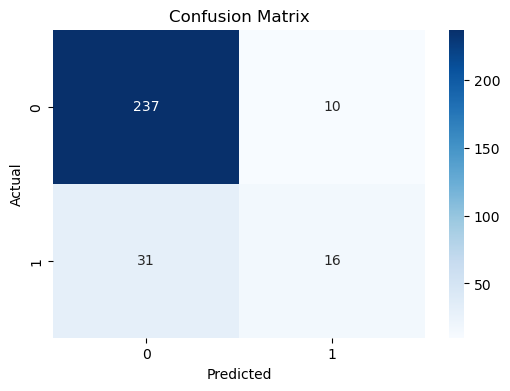

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Convert bool columns to int (True/False to 1/0)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model (increase max_iter if needed)
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Top 10 most important features:
                             Feature  Coefficient  AbsCoefficient
13                          OverTime     0.864567        0.864567
25  BusinessTravel_Travel_Frequently     0.751247        0.751247
35     JobRole_Laboratory Technician     0.714756        0.714756
18                 TotalWorkingYears    -0.555603        0.555603
23           YearsSinceLastPromotion     0.528704        0.528704
12                NumCompaniesWorked     0.487609        0.487609
4            EnvironmentSatisfaction    -0.481659        0.481659
41      JobRole_Sales Representative     0.481459        0.481459
26      BusinessTravel_Travel_Rarely     0.450070        0.450070
9                    JobSatisfaction    -0.419417        0.419417


<Figure size 800x600 with 0 Axes>

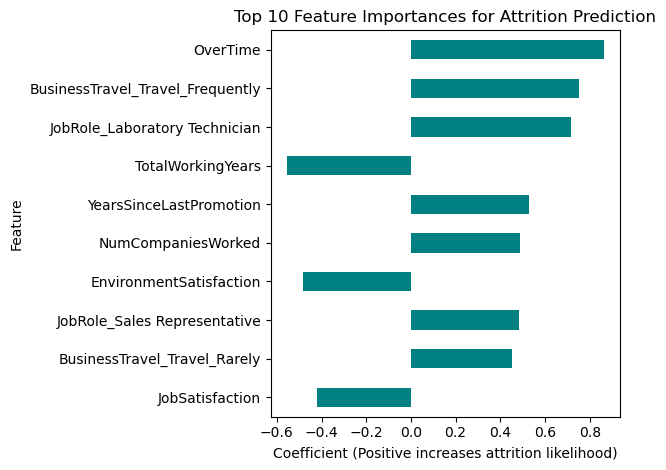

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names and coefficients from the trained model
feature_names = X.columns
coefficients = model.coef_[0]

# Create DataFrame for easier viewing
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by absolute value of coefficient
feat_importance['AbsCoefficient'] = feat_importance['Coefficient'].abs()
feat_importance = feat_importance.sort_values(by='AbsCoefficient', ascending=False)

print("Top 10 most important features:")
print(feat_importance.head(10))

# Plot top 10 features
plt.figure(figsize=(8,6))
feat_importance.head(10).plot.barh(x='Feature', y='Coefficient', color='teal', legend=False)
plt.title("Top 10 Feature Importances for Attrition Prediction")
plt.xlabel("Coefficient (Positive increases attrition likelihood)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Use already scaled X_train_scaled, X_test_scaled
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Test Accuracy: 0.8333
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294

